In [ ]:
!pip install pycaret

In [2]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [16]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
(pd.to_numeric(station_all["skyl1_o"],errors="coerce")*3.28084).describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    99790.000000
mean      1697.051132
std       1423.666384
min          0.000000
25%        298.556440
50%       1499.343880
75%       2700.131320
max       6000.656360
Name: skyl1_o, dtype: float64

In [42]:
#Count values for skyc1
station=station_all[["skyl1_o","temp_o"]]
#clouds height meters to feet
num=pd.to_numeric(station.skyl1_o, errors="coerce")*3.28084
#median 1500 feet
interval=pd.IntervalIndex.from_tuples([(-1, 1500),(1500,7000)])
labels=["<=1500ft",">1500ft"]
station["skyl1_l"]=pd.cut(num, bins=interval,retbins=False,labels=labels)
station["skyl1_l"]=station["skyl1_l"].map({a:b for a,b in zip(interval,labels)})
station["skyl1_l"]=station["skyl1_l"].astype(str).replace("nan","No Cloud")
station=station.drop(columns=["temp_o"])
station["skyl1_l"].value_counts()


No Cloud    129460
<=1500ft     52224
>1500ft      47566
Name: skyl1_l, dtype: int64

In [43]:
# skyl from metar to label
pd.options.display.max_rows = 999
station.sample(100)

,skyl1_o,skyl1_l
time,,
2011-07-14 23:30:00,M,No Cloud
2014-09-11 22:30:00,610.0,>1500ft
2018-09-13 02:30:00,M,No Cloud
2019-12-18 09:30:00,91.0,<=1500ft
2009-12-14 15:00:00,M,No Cloud
2009-08-03 17:30:00,M,No Cloud
2017-05-08 19:00:00,M,No Cloud
2011-09-13 05:00:00,30.0,<=1500ft
2008-09-06 11:30:00,M,No Cloud


**Forecast D0**

In [22]:
#ria forecast d1
model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")
model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,144.628357,3.831499,6.448897,102287.132812,280.022430,0.892607,24102.808594,12.980614,293.892212,0.0,...,0.0,-0.000188,1.0,0.000000,0.000000,1.00000,5597.893066,1497.146240,253.327194,277.210388
2008-01-01 02:00:00,147.921097,3.832692,6.672883,102206.570312,280.007874,0.876593,24068.431641,16.218111,301.791016,0.0,...,0.0,0.000039,1.0,0.000000,0.530000,1.00000,5589.398926,1489.944702,252.961868,277.016876
2008-01-01 03:00:00,143.393280,5.442433,8.808276,102199.117188,280.104797,0.852357,24079.357422,30.171259,310.720306,0.0,...,0.0,0.000066,1.0,0.000000,1.000000,1.00000,5583.069824,1489.035278,252.982819,276.464508
2008-01-01 04:00:00,148.121201,5.950326,9.456440,102130.187500,280.257111,0.826763,24082.630859,39.340668,311.036621,0.0,...,0.0,0.000102,1.0,0.000000,1.000000,1.00000,5578.958984,1486.376465,252.923691,276.808807
2008-01-01 05:00:00,144.934830,6.004587,9.431707,102095.398438,280.096802,0.815603,24156.925781,38.444511,268.789703,0.0,...,0.0,-0.000305,0.0,0.000000,0.000000,0.00000,5576.894043,1483.500488,253.006378,277.129700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,331.899139,0.0,...,0.0,0.000750,0.6,0.093750,0.000000,0.60000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,366.950897,0.0,...,0.0,0.000316,0.5,0.500000,0.531250,0.53125,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,367.624512,0.0,...,0.0,-0.000039,0.6,0.500000,0.453125,0.60000,5681.215820,1519.740967,258.154877,280.516174


In [44]:
#concat station model
df_all4k=pd.concat([station,model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["skyl1_o"])
df_all4k.sample(100)

,skyl1_l,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2014-03-07 13:00:00,No Cloud,250.795273,1.511344,1.638839,102175.335938,292.457123,0.490160,24041.041016,191.600006,307.979095,...,0.000000,-0.000002,0.000000,0.000000,0.000000,0.000000,5681.422363,1531.943359,256.191986,283.103943
2009-04-10 06:00:00,No Cloud,321.193970,6.667598,10.238661,100851.906250,280.383759,0.815729,24045.019531,55.672882,267.827942,...,31.850000,-11.657344,0.000000,0.004354,0.000000,0.004354,5319.557129,1372.422485,247.455856,271.548798
2012-08-27 09:00:00,>1500ft,150.796829,3.225388,4.013013,101787.132812,288.931610,0.811193,24134.781250,36.975548,348.320862,...,0.000000,-0.004258,1.000000,0.000000,0.510000,1.000000,5746.345215,1496.921997,262.866577,286.617737
2011-08-06 04:00:00,No Cloud,179.400894,7.333042,12.930873,101026.281250,290.518433,0.966474,21438.925781,13.626447,400.946442,...,0.000000,-0.004922,1.000000,1.000337,1.000000,1.000337,5713.229004,1454.941040,266.987000,287.329315
2010-02-23 09:00:00,No Cloud,227.259705,8.603172,14.508136,99776.492188,283.922943,0.869651,24037.929688,53.025703,353.370056,...,426.700012,-5.243047,1.000000,1.004613,0.390000,1.004613,5320.060059,1323.845947,246.621445,275.573547
2016-10-06 02:00:00,No Cloud,118.953018,1.878061,3.718585,101432.273438,285.364075,0.856694,24037.593750,3.286804,296.347534,...,0.000000,0.000352,0.000000,0.000000,0.000000,0.000000,5691.881836,1478.402344,260.757812,287.967743
2008-09-27 20:00:00,No Cloud,32.792065,1.009038,2.961568,101857.039062,288.444946,0.821657,24055.509766,6.649236,318.463745,...,0.000000,-0.001641,0.000000,0.000000,0.000000,0.000000,5675.903809,1513.947632,257.056183,283.521698
2019-07-27 11:00:00,<=1500ft,271.482574,3.746984,4.690160,101086.414062,293.096313,0.842298,18244.441406,84.199997,356.684631,...,139.490005,0.000121,0.000000,0.300000,0.000000,0.300000,5660.126953,1448.952148,265.619141,283.516754
2009-07-07 10:00:00,No Cloud,352.684326,4.631336,5.112853,101831.507812,292.927887,0.559183,24053.656250,193.342941,306.809601,...,0.664000,0.000223,0.000000,0.000000,0.000000,0.000000,5709.965820,1494.049683,262.984924,281.394012


**machine learning d0**

In [45]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k,
             target = 'skyl1_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,skyl1_l
2,Target Type,Multiclass
3,Label Encoded,"<=1500ft: 0, >1500ft: 1, No Cloud: 2"
4,Original Data,"(106306, 231)"
5,Missing Values,False
6,Numeric Features,230
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7860,0.9089,0.6838,0.7757,0.7717,0.6026,0.6145,15.108
rf,Random Forest Classifier,0.7824,0.9060,0.6792,0.7720,0.7681,0.5957,0.6077,34.538
lightgbm,Light Gradient Boosting Machine,0.7714,0.8964,0.6671,0.7589,0.7566,0.5758,0.5869,4.674
ada,Ada Boost Classifier,0.7377,0.8468,0.6213,0.7185,0.7173,0.5093,0.5223,10.624
dt,Decision Tree Classifier,0.6868,0.7444,0.6179,0.6896,0.6881,0.4602,0.4602,2.766
qda,Quadratic Discriminant Analysis,0.6558,0.7867,0.6024,0.6673,0.6577,0.4179,0.4207,0.242
nb,Naive Bayes,0.6624,0.7632,0.5784,0.6541,0.6518,0.4013,0.4051,0.164
lda,Linear Discriminant Analysis,0.6677,0.8070,0.5680,0.6486,0.6514,0.3907,0.3967,1.044
ridge,Ridge Classifier,0.6653,0.0000,0.5441,0.6415,0.6355,0.3646,0.3799,0.130
knn,K Neighbors Classifier,0.6204,0.7435,0.5406,0.6131,0.6158,0.3336,0.3342,13.402


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [63]:
model=create_model("lightgbm",n_estimators=150,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7735,0.9007,0.6698,0.7613,0.7587,0.5798,0.5910
1,0.7714,0.8973,0.6702,0.7597,0.7574,0.5769,0.5872
2,0.7783,0.9014,0.6763,0.7670,0.7645,0.5894,0.6001
3,0.7701,0.8972,0.6685,0.7571,0.7565,0.5760,0.5851
4,0.7752,0.8991,0.6735,0.7630,0.7614,0.5844,0.5945
Mean,0.7737,0.8991,0.6717,0.7616,0.7597,0.5813,0.5916
SD,0.0029,0.0017,0.0028,0.0033,0.0029,0.0050,0.0053


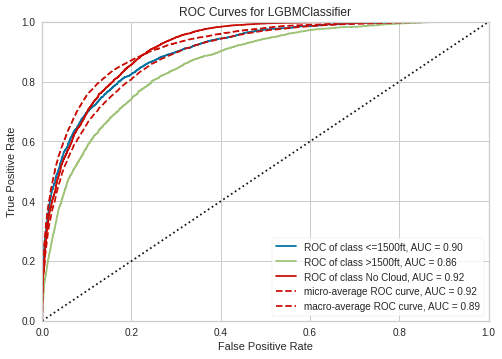

In [64]:
plot_model(model, plot = 'auc')

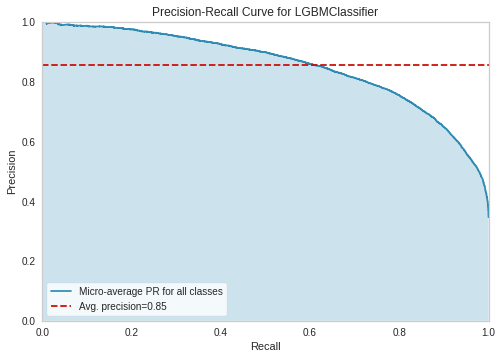

In [65]:
plot_model(model, plot = 'pr')

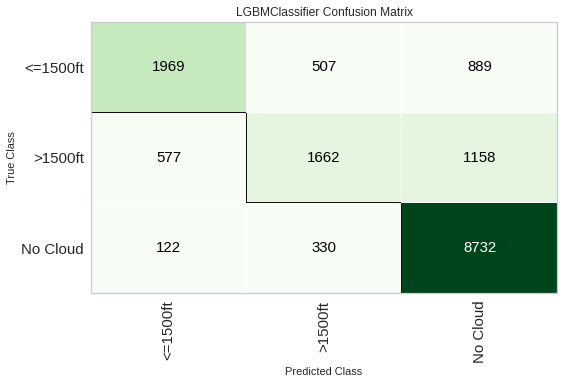

In [66]:
plot_model(model,'confusion_matrix')

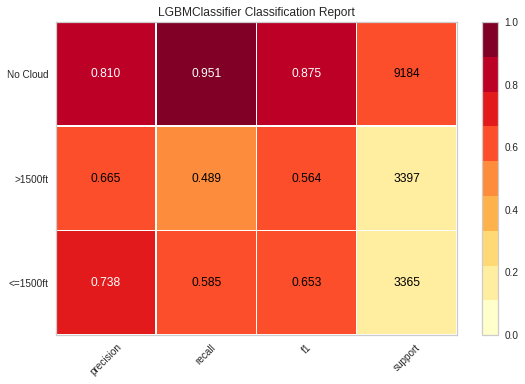

In [67]:
plot_model(model,'class_report')

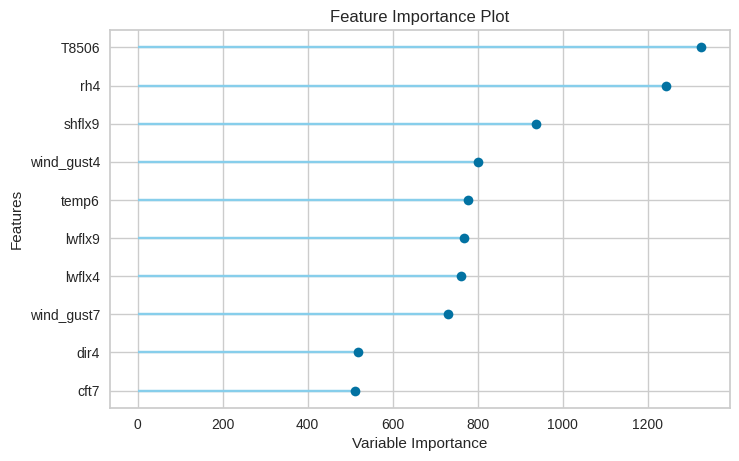

In [68]:
plot_model(model,"feature")

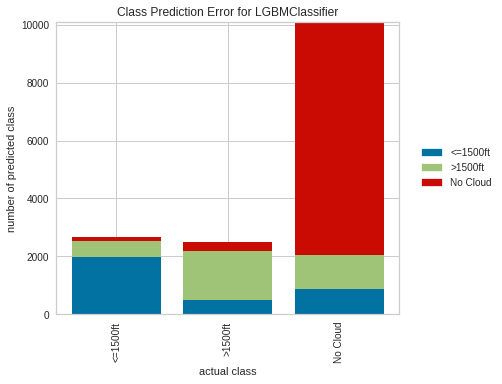

In [69]:
plot_model(model,"error")

**Export model**

In [70]:
x_var=get_config("X_train").columns
x_var

Index(['cfl6', 'lwflx9', 'cfl4', 'cft6', 'cfl7', 'cfl3', 'cfl9', 'cfl2',
       'cft7', 'cape9', 'dir9', 'shflx9', 'cfl8', 'dir5', 'rh4', 'cfl0',
       'cfl1', 'dir4', 'wind_gust4', 'temp6', 'dir8', 'wind_gust7', 'lwflx4',
       'T8506', 'cfl5', 'dir2'],
      dtype='object')

In [71]:
#define x and y
Y=df_all4k.skyl1_l
X=df_all4k[x_var]

In [72]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


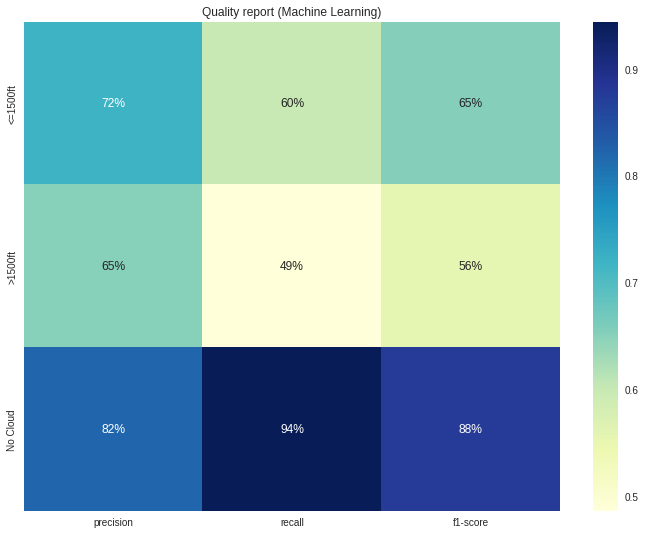

In [73]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report (Machine Learning)")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


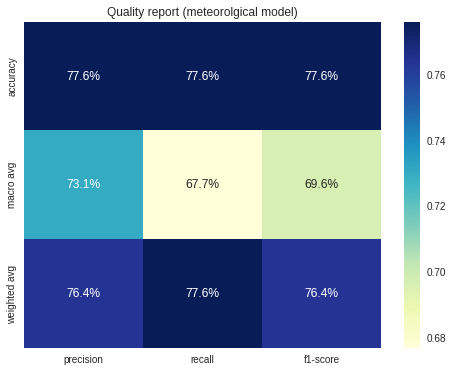

In [74]:
plt.figure(figsize=(8, 6))
plt.title("Quality report (meteorolgical model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

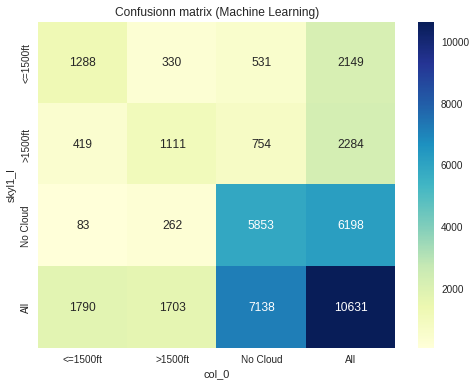

In [75]:
plt.figure(figsize=(8, 6))
plt.title("Confusionn matrix (Machine Learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

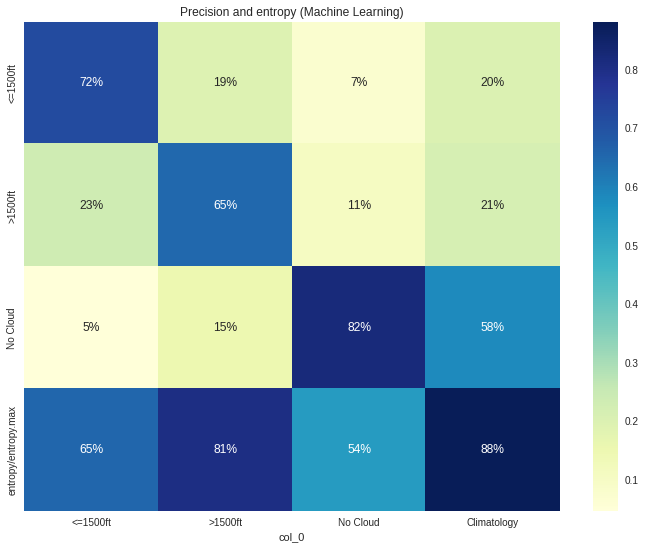

In [76]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy (Machine Learning)")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [77]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("skyl1_LEVX_d0.al", 'wb'))